<a href="https://colab.research.google.com/github/Eran707/MSc-Computational-Neuroscience-Repo/blob/master/Multicompartment_Sim_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Multicompartment Simulator**

**Eran Frank Shorer**

**MSc Computational Neuroscience**

**"Investigating the effects of impermeant anions on the electrical and computational properties of neurons"**




## Instructions:

This jupyter notebook consists of cells. Some cells are plain text, while others are code. 

Press Shift-Enter simultaneously, or click the cell and press the play button in the main toolbar above to run the cell. 

The output of the cell should be displayed below the cell. 



## **Import classes and modules** 


In [14]:

try:
    
    import simulator2
    import compartment
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import bqplot as bqp
    from bqplot import pyplot as plt # bqplot is a plotting for jupyter
    import matplotlib.pyplot as mplt
  
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
  
    
    
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    sim = simulator2.simulator("Test") 
    print("All relevant classes imported")
    print("New simulator created")
    





simulation file ('Test') created
All relevant classes imported
New simulator created


## A1) Set compartment parameters:

In [15]:
### WIDGET INITIALIZATION ################################################################################
txt_name = widgets.Text(value="Comp1")
lbl_name = widgets.Label(value ="Compartment Name: ")
name_box = widgets.HBox(children = [lbl_name,txt_name])


lbl_rad = widgets.Label(value = "Compartment Radius (um): ")
sldr_rad = widgets.FloatSlider(value=1, min=1, max=10.0, step=0.5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
rad_box = widgets.HBox(children = [lbl_rad,sldr_rad])

lbl_len = widgets.Label(value = "Compartment Length (um): ")
sldr_len = widgets.FloatSlider(value=10, min=0, max=50, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
len_box = widgets.HBox(children = [lbl_len,sldr_len])

lbl_nai = widgets.Label(value = "Na+ concentration (mM): ")
sldr_nai = widgets.FloatSlider(value=14, min=0, max=100, step=10, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_nai = widgets.HBox(children = [lbl_nai,sldr_nai])

lbl_ki = widgets.Label(value = "K+ concentration (mM): ")
sldr_ki = widgets.FloatSlider(value=122, min=0, max=250, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_ki = widgets.HBox(children = [lbl_ki,sldr_ki])

lbl_cli = widgets.Label(value = "Cl- concentration (mM): ")
sldr_cli = widgets.FloatSlider(value=5, min=0, max=50, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_cli = widgets.HBox(children = [lbl_cli,sldr_cli])

lbl_xi = widgets.Label(value = "Impermeant anion concentration (mM): ")
sldr_xi = widgets.FloatSlider(value=154.9, min=0, max=600, step=10, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.2f')
hbox_xi = widgets.HBox(children = [lbl_xi,sldr_xi])

lbl_zi = widgets.Label(value = "Impermeant anion average charge: ")
sldr_zi = widgets.FloatSlider(value=-0.85, min=-3, max=0, step=0.05, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.2f')
hbox_zi = widgets.HBox(children = [lbl_zi,sldr_zi])

lbl_neutral_start = widgets.Label(value = "Adjust starting concentrations for electroneutrality")
chk_neutral_start = widgets.Checkbox(value = True)
hbox_neutral_start = widgets.HBox(children = [lbl_neutral_start,chk_neutral_start])

########################################################################################################


global comp_arr, df_sim


#CREATION OF THE PANDAS DATA FRAME THAT WILL KEEP TRACK OF ALL THE VARIABLES IN REAL TIME
df_sim = pd.DataFrame()

comp_arr =[]

output1 = widgets.Output()


btn_new_comp = widgets.Button(description = "Create Compartment",button_style ="success")
btn_defaults = widgets.Button(description = "Reset to defaults")
hbox_btns = widgets.HBox(children = [btn_new_comp, btn_defaults])



def new_comp_clicked(b):
    
    name = txt_name.value
    for j in range (len(comp_arr)):
        if name == comp_arr[j].name:
            txt_name.color = 'red'
            raise Exception("Two compartments cannot have the same name")
    new_comp = compartment.Compartment(name, radius = sldr_rad.value*1e-5, length= sldr_len.value*1e-5)
    
    if chk_neutral_start.value == True:
        osmol_neutral_start = True
    else: osmol_neutral_start = False
    
    new_comp.set_ion_properties(na_i=sldr_nai.value*1e-3, 
                                k_i = sldr_ki.value*1e-3, 
                                cl_i=sldr_cli.value*1e-3,
                                x_i=sldr_xi.value*1e-3, 
                                z_i=sldr_zi.value, 
                                osmol_neutral_start = osmol_neutral_start)
    
    sim.add_compartment(new_comp)
    
    
    
    
    with output1:
        print("Compartment: ("+ new_comp.name +") created" )
        
      
btn_new_comp.on_click(new_comp_clicked)

def btn_defaults_clicked(b):
    
    
    sldr_rad.value=1
    sldr_len.value = 10
    sldr_nai.value= 14
    sldr_ki.value = 122
    sldr_cli.value = 5
    sldr_xi.value = 150
    sldr_zi.value = -0.85
    
btn_defaults.on_click(btn_defaults_clicked)


vbox_grand = widgets.VBox(children = [name_box,rad_box,len_box, hbox_nai,hbox_ki,hbox_cli,hbox_xi,hbox_zi, hbox_neutral_start, hbox_btns], layout=Layout(border ="solid"))

display(output1,vbox_grand)







Output()

## A2) Review & edit compartments

In [16]:
################################################################################
#  WIDGET INITIALIZATION

btn_review = widgets.Button(description = "Review compartments", button_style ="success")
output2 = widgets.Output()
display(btn_review,output2)

btn_edit = widgets.Button(description = "Edit compartments", button_style ="success")
output3 = widgets.Output()

btn_save_edit = widgets.Button(description = "Save change", button_style ="success",visible='false')


def btn_review_clicked(b):
    output2.clear_output()
    with output2:
        display(df_sim)

btn_review.on_click(btn_review_clicked)       





display(btn_edit,output3)




def btn_edit_clicked(b):
    
    output3.clear_output()
    opts_comp =[]
    for i in range(len(sim.comp_arr)):
        opts_comp.append(sim.comp_arr[i].name)

    global drp_comp,drp_param,txt_new_val
    drp_comp=widgets.Dropdown(options=opts_comp,description='Compartment:',visible='false')
    opts_param=df_sim.index.array[0:10]
    drp_param=widgets.Dropdown(options=opts_param, description='Parameter:', visible='false')

    txt_new_val=widgets.Text(value='', description='New value:', visible='false')
     

    
    drp_param.visible ="true"
    drp_comp.visible ="true"
    txt_new_val.visible="true"
    btn_save_edit.visible ='true'
    
    with output3:
        display(drp_comp,drp_param,txt_new_val,btn_save_edit)
  




btn_edit.on_click(btn_edit_clicked)




def btn_save_edit_clicked(b):
    comp = drp_comp.value
    param = drp_param.value
    change = txt_new_val.value
    
    df_sim.loc[param,comp] = change
    output2.clear_output()
    output3.clear_output()
    with output3:
        display(df_sim)

btn_save_edit.on_click(btn_save_edit_clicked)  



Button(button_style='success', description='Review compartments', style=ButtonStyle())

Output()

Button(button_style='success', description='Edit compartments', style=ButtonStyle())

Output()

## *A3) Simulation settings*

In [17]:
global total_t,dt,t_arr, constant_j_atp, constant_ar


############################################################################
#TIMING

lbl_total_t = widgets.Label(value="Set the simulation run time (minutes):")

sldr_total_t = widgets.FloatSlider(value=1, min=0.5, max=40, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',
    readout=True, readout_format='.1f')
HBox_total_t = widgets.HBox(children = [lbl_total_t,sldr_total_t])


lbl_dt = widgets.Label(value="Set the simulation time step (milliseconds):")
sldr_dt = widgets.FloatSlider(value=0.01, min=0.001, max=0.1, step=0.005, disabled=False, continuous_update=False, orientation='horizontal',
    readout=True, readout_format='.4')
HBox_dt = widgets.HBox(children = [lbl_dt,sldr_dt])

############################################################################
# ATPase PROPERTIES

lbl_atpase = widgets.Label(value = "ATPase model type:")
rdb_atpase = widgets.RadioButtons(options=['J_ATP = p * (Na_in/Na_out)^3', 'Constant'])

hbox_atpase = widgets.HBox(children = [lbl_atpase,rdb_atpase], layout =Layout(border='solid'))

############################################################################
# ATPase PROPERTIES

lbl_ar = widgets.Label(value = "Area scale type:")
rdb_ar = widgets.RadioButtons(options=['Constant','Am = Surface Area / volume'])

hbox_ar = widgets.HBox(children = [lbl_ar,rdb_ar], layout =Layout(border='solid'))


############################################################################
# EXTERNAL ION PROPERTIES

lbl_ext_ions = widgets.Label(value = "External Ion Parameters:")

lbl_nao = widgets.Label(value = "Na+ concentration (mM): ")
sldr_nao = widgets.FloatSlider(value=145, min=0, max=200, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.2f')
hbox_nao = widgets.HBox(children = [lbl_nao,sldr_nao])

lbl_ko = widgets.Label(value = "K+ concentration (mM): ")
sldr_ko = widgets.FloatSlider(value=3.5, min=0, max=10, step=0.5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_ko = widgets.HBox(children = [lbl_ko,sldr_ko])

lbl_clo = widgets.Label(value = "Cl- concentration (mM): ")
sldr_clo = widgets.FloatSlider(value=119, min=100, max=200, step=1, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.2f')
hbox_clo = widgets.HBox(children = [lbl_clo,sldr_clo])

lbl_xo = widgets.Label(value = "Impermeant anion concentration (mM): ")
sldr_xo = widgets.FloatSlider(value=29.5, min=0, max=50, step=0.5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.2f')
hbox_xo = widgets.HBox(children = [lbl_xo,sldr_xo])

lbl_zo = widgets.Label(value = "Impermeant anion average charge: ")
sldr_zo = widgets.FloatSlider(value=-0.85, min=-3, max=0, step=0.05, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.2f')
hbox_zo = widgets.HBox(children = [lbl_zo,sldr_zo])

vbox_ext_ions = widgets.VBox(children = [lbl_ext_ions,hbox_nao,hbox_ko,hbox_clo,hbox_xo,hbox_zo],layout =Layout(border='solid'))

t_arr = [0]


vbox_t = widgets.VBox([HBox_total_t,HBox_dt], layout=Layout(border='solid'))



display(vbox_t,hbox_atpase, hbox_ar, vbox_ext_ions)






## A4) Anion Flux Settings:


### i ) Increase intracellular impermeant anions concentration during simulation

Changing the concentration and charge of impermeant anions replicates changes such a increased protein transcription.

In [18]:
global xflux_start_t, xflux_end_t, xflux_on
###############################################################################
# Widget Initialization
# Simulating protein synthesis

output_xflux = widgets.Output()
output_xflux2 = widgets.Output()

lbl_xflux = widgets.Label(value="Add intracellular impermeant anions mid simulation:")

chk_xflux = widgets.Checkbox(value = False)
hbox_xflux = widgets.HBox(children = [lbl_xflux, chk_xflux])
vbox_xflux_1 = widgets.VBox(children = [hbox_xflux])
vbox_xflux_static = widgets.VBox()
vbox_xflux_dynamic = widgets.VBox()

xflux_on = False

with output_xflux:
    display(vbox_xflux_1)

    
lbl_xflux_comp = widgets.Label (value = "Select compartment")
drp_xflux_comp = widgets.Dropdown()
comp_options = []
comp_options.append("All compartments")
for i in range(len(sim.comp_arr)):
    comp_options.append(sim.comp_arr[i].name)
drp_xflux_comp.options = comp_options
hbox_xflux_comp = widgets.HBox(children = [lbl_xflux_comp, drp_xflux_comp])

rdb_xflux_type = widgets.RadioButtons(options=["Static/Constant rate of addition",'Dynamic rate of addition'])

lbl_xflux_static_rate = widgets.Label(value="Rate of ion flux mM/min")
sldr_xflux_static_rate = widgets.FloatSlider(value = 0.2, min=0.01, max=0.8, step=0.01)
hbox_xflux_static_rate = widgets.HBox(children = [lbl_xflux_static_rate, sldr_xflux_static_rate])


lbl_xflux_conc = widgets.Label(value="Concentration of anions to add (mM)")
sldr_xflux_conc = widgets.FloatSlider(value=2, min=0, max=10, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.2f')
hbox_xflux_conc = widgets.HBox(children = [lbl_xflux_conc,sldr_xflux_conc])

lbl_xflux_charge = widgets.Label(value="Charge of added anions")
sldr_xflux_charge = widgets.FloatSlider(value=-0.85, min=-2, max=-0.1, step=0.05, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.2f')
hbox_xflux_charge = widgets.HBox(children = [lbl_xflux_charge,sldr_xflux_charge])

lbl_xflux_start_t = widgets.Label(value="Time to start anion flux (s)")
sldr_xflux_start_t = widgets.FloatSlider(value=1, min=0.5, max=10000, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.1f')
hbox_xflux_start_t = widgets.HBox(children = [lbl_xflux_start_t,sldr_xflux_start_t])

lbl_xflux_end_t = widgets.Label(value="Time to end anion flux (s)")
sldr_xflux_end_t = widgets.FloatSlider(value=1, min=0.5, max=10000, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',       readout=True, readout_format='.1f')
hbox_xflux_end_t = widgets.HBox(children = [lbl_xflux_end_t,sldr_xflux_end_t])

vbox_xflux_2 = widgets.VBox(children =[hbox_xflux_comp, rdb_xflux_type])
                                       
vbox_xflux_dynamic = widgets.VBox(children =[hbox_xflux_conc,  hbox_xflux_charge, hbox_xflux_start_t, hbox_xflux_end_t ], layout=Layout(border ="solid"))
vbox_xflux_static = widgets.VBox(children = [hbox_xflux_static_rate, hbox_xflux_charge, hbox_xflux_start_t, hbox_xflux_end_t], layout=Layout(border ="solid"))

#############################################################################
display(output_xflux)
display(output_xflux2)


def set_x_flux(b):
    
    if chk_xflux.value == True:
        
        xflux_on = True
        
        
        sldr_xflux_start_t.value = sldr_total_t.value *60 /5
        sldr_xflux_start_t.max = sldr_total_t.value *60
        sldr_xflux_end_t.value = sldr_total_t.value *60
        sldr_xflux_end_t.max = sldr_total_t.value *60
        
          
        output_xflux.clear_output()    
        with output_xflux:
            display(vbox_xflux_1, vbox_xflux_2)
        output_xflux2.clear_output()
        with output_xflux2:
            display(vbox_xflux_static)
        
        
    elif chk_xflux.value == False:
        xflux_on = False
        output_xflux.clear_output()
        display(vbox_xflux_1)
        
        

def set_xflux_type(b):
    
    if rdb_xflux_type.value == "Static/Constant rate of addition":
        
        xflux_type = 'static'
        output_xflux2.clear_output()
        with output_xflux2:
            display(vbox_xflux_static)
        
        
    else:
        
        xflux_type = 'dynamic'
        output_xflux2.clear_output()
        with output_xflux2:
            display(vbox_xflux_dynamic)
        
chk_xflux.observe(set_x_flux)
rdb_xflux_type.observe(set_xflux_type)
 

Output()

Output()

### ii) Alter charge of intracellular impermeant anions

Changing the charge of impermeant anions (without changing concentrations)  replicates post-translational protein modifications that alters protein charge, e.g. phosphorylation, protonation of impermeant anions.


In [19]:

lbl_zflux = widgets.Label(value="Change intracellular impermeant anions charge during simulation:")
lbl_zflux_2 = widgets.Label(value="______Modelling change to average charge of impermeants ______")
chk_zflux = widgets.Checkbox(value = False)
hbox_zflux = widgets.HBox(children = [lbl_zflux, chk_zflux])
vbox_zflux_1 = widgets.VBox(children = [lbl_zflux_2,hbox_zflux])


output_zflux = widgets.Output()
with output_zflux:
    display(vbox_zflux_1)


    
zflux_on = False

lbl_zflux_comp = widgets.Label (value = "Select compartment")
drp_zflux_comp = widgets.Dropdown()
comp_options = []
comp_options.append("All compartments")
for i in range(len(sim.comp_arr)):
    comp_options.append(sim.comp_arr[i].name)
drp_zflux_comp.options = comp_options
hbox_zflux_comp = widgets.HBox(children = [lbl_zflux_comp, drp_zflux_comp])
    
lbl_zflux_charge = widgets.Label(value="Desired average charge of impermeant anions")
sldr_zflux_charge = widgets.FloatSlider(value=-0.85, min=-3, max= 1, step=0.05, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.2f')
hbox_zflux_charge = widgets.HBox(children = [lbl_zflux_charge,sldr_zflux_charge])

lbl_zflux_start_t = widgets.Label(value="Time to start anion flux (s)")
sldr_zflux_start_t = widgets.FloatSlider(value=1, min=0.5, max=10000, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.1f')
hbox_zflux_start_t = widgets.HBox(children = [lbl_zflux_start_t,sldr_zflux_start_t])

lbl_zflux_end_t = widgets.Label(value="Time to end anion flux (s)")
sldr_zflux_end_t = widgets.FloatSlider(value=1, min=0.5, max=10000, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',       readout=True, readout_format='.1f')
hbox_zflux_end_t = widgets.HBox(children = [lbl_zflux_end_t,sldr_zflux_end_t])

vbox_zflux_2 = widgets.VBox(children =[hbox_zflux_comp,hbox_zflux_charge, hbox_zflux_start_t, hbox_zflux_end_t ], layout=Layout(border ="solid"))



display(output_zflux)

def set_z_flux(b):
    
    if chk_zflux.value == True:
        
        zflux_on = True
        
        
        sldr_zflux_start_t.value = sldr_total_t.value *60 /5
        sldr_zflux_start_t.max = sldr_total_t.value *60
        sldr_zflux_end_t.value = sldr_total_t.value *60
        sldr_zflux_end_t.max = sldr_total_t.value *60
        
          
        output_zflux.clear_output()    
        with output_zflux:
            display(vbox_zflux_1, vbox_zflux_2)
        #print(x_flux_on)
        
    elif chk_zflux.value == False:
        zflux_on = False
        output_zflux.clear_output()
        display(vbox_zflux_1)
        
        
        
    

chk_zflux.observe(set_z_flux)


Output()

### iii) Increase extracellular impermeant anions


In [20]:
output_xoflux = widgets.Output()

lbl_xoflux = widgets.Label(value="Change extracellular impermeant anions mid simulation:")

chk_xoflux = widgets.Checkbox(value = False)
hbox_xoflux = widgets.HBox(children = [lbl_xoflux, chk_xoflux])
vbox_xoflux_1 = widgets.VBox(children = [hbox_xoflux])

xoflux_on = False

with output_xoflux:
    display(vbox_xoflux_1)
    
lbl_xoflux_conc = widgets.Label(value="Concentration of extracellular impermeant anions to add/subtract (mM)")
sldr_xoflux_conc = widgets.FloatSlider(value=30, min=-60, max=60, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.2f')
hbox_xoflux_conc = widgets.HBox(children = [lbl_xoflux_conc,sldr_xoflux_conc])

lbl_xoflux_charge = widgets.Label(value="Charge of extracellular impermeant anions")
sldr_xoflux_charge = widgets.FloatSlider(value=-0.85, min=-2, max=-0.1, step=0.05, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.2f')
hbox_xoflux_charge = widgets.HBox(children = [lbl_xoflux_charge,sldr_xoflux_charge])

lbl_xoflux_start_t = widgets.Label(value="Time to start extracellular anion flux (s)")
sldr_xoflux_start_t = widgets.FloatSlider(value=1, min=0.5, max=10000, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',readout=True, readout_format='.1f')
hbox_xoflux_start_t = widgets.HBox(children = [lbl_xoflux_start_t,sldr_xoflux_start_t])

lbl_xoflux_end_t = widgets.Label(value="Time to end extracellular anion flux (s)")
sldr_xoflux_end_t = widgets.FloatSlider(value=1, min=0.5, max=10000, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',       readout=True, readout_format='.1f')
hbox_xoflux_end_t = widgets.HBox(children = [lbl_xoflux_end_t,sldr_xoflux_end_t])

vbox_xoflux_2 = widgets.VBox(children =[hbox_xoflux_conc,  hbox_xoflux_charge, hbox_xoflux_start_t, hbox_xoflux_end_t ], layout=Layout(border ="solid"))
#############################################################################

display(output_xoflux)


def set_xo_flux(b):
    
    if chk_xoflux.value == True:
        
        xoflux_on = True
        
        
        sldr_xoflux_start_t.value = sldr_total_t.value *60 /5
        sldr_xoflux_start_t.max = sldr_total_t.value *60
        sldr_xoflux_end_t.value = sldr_total_t.value *60
        sldr_xoflux_end_t.max = sldr_total_t.value *60
        
          
        output_xoflux.clear_output()    
        with output_xoflux:
            display(vbox_xoflux_1, vbox_xoflux_2)
        
        
    elif chk_xoflux.value == False:
        xoflux_on = False
        output_xoflux.clear_output()
        display(vbox_xoflux_1)
        
        
chk_xoflux.observe(set_xo_flux)
 

Output()

## A5) Add synaptic input


In [23]:
#########################################################
# Widget initialization


btn_synapse = widgets.Button(description = 'Add Synapse', button_style='info')
btn_synapse_confirm = widgets.Button(description = 'Confirm synapse', buttons_style ='success')
btn_synapse_reset =widgets.Button(description ='Reset all synapses', button_style = 'danger',disabled =True)

output_synapse =widgets.Output()
output_synapse_list =widgets.Output()
vbox_synapse = widgets.VBox(children=[output_synapse,output_synapse_list])

lbl_synapse_comp = widgets.Label(value ="Select Compartment: ")
drp_synapse_comp = widgets.Dropdown()
drp_synapse_comp_options = []
for i in range(len(sim.comp_arr)):
    drp_synapse_comp_options.append(sim.comp_arr[i].name)
drp_synapse_comp.options = drp_synapse_comp_options
hbox_synapse_comp = widgets.HBox(children=[lbl_synapse_comp, drp_synapse_comp])



rdb_synapse_type = widgets.RadioButtons(options = ["Excitatory (Glutamatergic)","Inhibitory (Gabaergic)"])
lbl_synapse_current =widgets.Label(value ='Current (mA): ')
sldr_synapse_current = widgets.FloatSlider( min = 0, value=10, max=20)
hbox_synapse_current = widgets.HBox(children=[lbl_synapse_current,sldr_synapse_current])

total_t = sldr_total_t.value
dt = sldr_dt.value

lbl_synapse_t_start = widgets.Label(value="Start time(min)")
sldr_synapse_t_start = widgets.FloatSlider( min = 0, value= 10, max= total_t) 
hbox_synapse_t_start = widgets.HBox(children = [lbl_synapse_t_start, sldr_synapse_t_start])

lbl_synapse_t_end = widgets.Label(value="End time(min)")
sldr_synapse_t_end = widgets.FloatSlider( min = 0, value= 10, max= total_t) 
hbox_synapse_t_end = widgets.HBox(children = [lbl_synapse_t_end, sldr_synapse_t_end])

##################
    
#display(output_synapse)  

display(btn_synapse)
global synapse_number
global synapse_arr
 
synapse_number = 0
synapse_arr = [] # 2D array of all the synapses that have been added

def btn_synapse_clicked(b):
    with output_synapse:
        display(hbox_synapse_comp, rdb_synapse_type, hbox_synapse_current, hbox_synapse_t_start, hbox_synapse_t_end, btn_synapse_confirm,btn_synapse_reset)
    btn_synapse.disabled = True
    output_synapse.layout = Layout(border='solid')
    

    
def btn_synapse_confirm_clicked(b):
       
    syn_num = len(synapse_arr) 
    syn_comp = drp_synapse_comp.value
    syn_type = rdb_synapse_type.value
    syn_current = sldr_synapse_current.value
    syn_t_start = sldr_synapse_t_start.value
    syn_t_end = sldr_synapse_t_end.value
    synapse_arr.append([syn_num,syn_comp,syn_type, syn_current, syn_t_start, syn_t_end ])
    
    
    
   
    with output_synapse_list:
           print(synapse_arr[-1])

    
    
    
    btn_synapse_reset.disabled=False
        
        
def btn_synapse_reset_clicked(b):
    output_synapse_list.clear_output()
    synapse_arr.clear()

btn_synapse.on_click(btn_synapse_clicked)
btn_synapse_confirm.on_click(btn_synapse_confirm_clicked)
btn_synapse_reset.on_click(btn_synapse_reset_clicked)

display(vbox_synapse)




Button(button_style='info', description='Add Synapse', style=ButtonStyle())

## A6) Pre-simulation summary

In [24]:
###################################################################
# WIDGET INITIALIZATION

btn_summary = widgets.Button(description = 'View Presimulation summary ',button_style = "info", layout=Layout(width='20%'))
output_summary = widgets.Output()
display(btn_summary, output_summary)





def btn_summary_clicked(b):
    with output_summary:
        print("*********************")
        print("Compartment settings:")
        print("*********************")
        print(df_sim)
        print()
        print("*********************")
        print("Extracellular anion concentrations:")
        print("*********************")
        print("Na: " + str(sldr_nao.value) + " mM")
        print("K: " + str(sldr_ko.value) + " mM")
        print("Cl: " + str(sldr_clo.value) + " mM")
        print("X: " + str(sldr_xo.value) + " mM")
        print()
        print("*********************")
        print("Simulation settings:")
        print("*********************")
        print("Total time (mins): " + str(total_t))
        print("Timestep (ms): " + str(dt))
        print("ATPase Model type: " + rdb_atpase.value)
        print("Pump rate: " + str(0.1) )
        print("Area scale type: " + rdb_ar.value)  
        print()
        print("*********************")
        print("Impermeant anion changes:")
        print("*********************")
        
        if chk_xflux.value == True:
            print(drp_xflux_comp.value+" : increase intracellular impermeant anion concentration -  "+ str(sldr_xflux_conc.value)+" mM, valence: " + str(sldr_xflux_charge.value) +
                 ", between: " + str(sldr_xflux_start_t.value) + "s and  "+  str(sldr_xflux_end_t.value) + "s")
        else:
            print("No change of intracellular impermeant anion concentration mid simulation")
            
        if chk_zflux.value == True:
            print(drp_zflux_comp.value+" : change in intracellular impermeant anion charge - "+  " valence: " + str(sldr_zflux_charge.value) +
                 ", between: " + str(sldr_zflux_start_t.value) + "s and  "+  str(sldr_zflux_end_t.value) + "s")
            
        else:
            print("No change of intracellular  impermeant anion charge mid simulation")
            
        if chk_xoflux.value == True:
            print("Change in extracellular impermeant anions - " + str(sldr_xoflux_conc.value)+ " mM, valence: " + str(sldr_xoflux_charge.value) +
                 ", between: " + str(sldr_xoflux_start_t.value) + "s and  "+  str(sldr_xoflux_end_t.value) + "s")
            
        else:
            print("No change of extracellular impermeant anion concentration mid simulation")

btn_summary.on_click(btn_summary_clicked)




Button(button_style='info', description='View Presimulation summary ', layout=Layout(width='20%'), style=Butto…

Output()

# *B) Run Simulation:*

In [25]:

btn_sim = widgets.Button(description ="Run Simulation", button_style="Danger",disabled=False)
output5 = widgets.Output()
output6 = widgets.Output()
output7 = widgets.Output()



display(output6, output7, btn_sim)

global SIM_OVER

SIM_OVER = False

def btn_sim_clicked(b):
  
    
    #########
    # ELECTRODIFFUSION LINKAGES
    
    sim.set_electrodiffusion_properties(ED_on=True)    
       
    ##########
    ##########
    # TIMING 
   
    dt=sldr_dt.value*1e-3
    total_t= sldr_total_t.value *60
    interval = total_t/dt

    sim.set_timing(total_t=total_t, time_step=dt)
    
    #########
    # ATPASE SETTINGS
   
    if rdb_atpase.value == 'Constant':
        sim.set_j_atp(constant_j_atp=True)
    else: sim.set_j_atp(constant_j_atp=False)
    
    
    ######## 
    # AREA SCALE SETTINGS
    
    if rdb_ar.value == 'Constant':
        sim.set_area_scale(constant_ar=True)
    else: sim.set_area_scale(constant_ar=False)
        
    ########
    # EXTERNAL ION PARAMETERS:
    nao = sldr_nao.value*1e-3
    ko = sldr_ko.value*1e-3
    clo = sldr_clo.value*1e-3
    xo = sldr_xo.value*1e-3
    zo = sldr_zo.value 
    
    sim.set_external_ion_properties(na_o = nao, k_o = ko, cl_o = clo, x_o = xo, z_o = zo)
    
    ########
    # X-FLUX & Z-FLUX SETTINGS
    
    xflux_on = chk_xflux.value
    
    
    if xflux_on == True:
        
        if rdb_xflux_type.value == "Static/Constant rate of addition":
            xflux_type = "static"
        else: 
            xflux_type = "dynamic"
            xflux_rate = sldr_xflux_static_rate.value 
        
        xflux_start_t = sldr_xflux_start_t.value
        xflux_end_t = sldr_xflux_end_t.value
        xflux_conc = sldr_xflux_conc.value*1e-3
        xflux_charge = sldr_xflux_charge.value
        xflux_rate = sldr_xflux_static_rate.value*1e-3/(60)
        xcomps =[]
        
        if drp_xflux_comp.value == "All compartments":
            xflux_all_comps=True
            
        else:
            xflux_all_comps=False
            xcomps.append(drp_xflux_comp.value)
        
        sim.set_xflux(all_comps= xflux_all_comps, comps=xcomps, 
                      flux_type=xflux_type, 
                      start_t=xflux_start_t, 
                      end_t=xflux_end_t,
                      x_conc= xflux_conc,
                      z= xflux_charge, 
                      flux_rate=xflux_rate)
        
        
    zflux_on = chk_zflux.value
       
     
    if zflux_on == True: 
            
        zflux_start_t = sldr_zflux_start_t.value
        zflux_end_t = sldr_zflux_end_t.value
        zflux_charge = sldr_zflux_charge.value
        
        if drp_zflux_comp.value == "All compartments":
            zflux_all_comps=True
            zcomps = []
        else:
            zcomps = [drp_zflux_comp.value for a in range(len(sim.comp_arr)) if drp_zflux_comp.value==sim.comp_arr[a].name]
        
        sim.set_zflux(all_comps= zflux_all_comps,
                      comps= zcomps,
                      start_t= zflux_start_t,
                      end_t=zflux_end_t,
                      z= zflux_charge)
        
    xoflux_on = chk_xoflux.value
    
    if xoflux_on == True:
        
        xoflux_start_t = sldr_xoflux_start_t.value
        xoflux_end_t = sldr_xoflux_end_t.value
        xoflux_conc = sldr_xoflux_conc.value*1e-3
        xoflux_charge = sldr_xoflux_charge.value
        
        sim.set_xoflux(start_t=xoflux_start_t, 
                       end_t=xoflux_end_t, 
                       xo_conc=xoflux_conc, 
                       z_end= xoflux_charge)
            
    #######
 
        
     
    
    prg = widgets.FloatProgress(description='Simulating...', min=0,step=dt,max=total_t,value=0,continuous_update=True)
    lbl_prg = widgets.Label(value = "Percent complete:" )#+ str(round(run_t/total_t*100,2) ))
    with output6:
        display(prg, lbl_prg)
            
        
    ########
    # SIMULATION
    
    sim.run_simulation()
    
       
    SIM_OVER = True
    btn_sim.disabled=True
    lbl_finalvals = widgets.Label(value="Final Values:")
    with output7:  
        print("Simulation complete!")
        display(lbl_finalvals,df_sim)
        
        
        
btn_sim.on_click(btn_sim_clicked)  



Output()

Output()

Button(button_style='danger', description='Run Simulation', style=ButtonStyle())

## C) Graphing


In [12]:
##### 

btn_test = widgets.Button(description = "test")
output_test = widgets.Output()

display(btn_test,output_test)
t_arr =[]
t_arr_new = []
C1_vm_arr =[]
C2_vm_arr =[] 
C3_vm_arr =[]

def btn_test_clicked(b):
    
    with h5py.File("\ Test", mode='r') as hdf:
        C = hdf.get('COMPARTMENTS')
        C1 = C.get('Comp1')
        C2 = C.get('Comp2')
        print(list(C.items()))
        #C3 = C.get('Comp3')
        
        for t in range(len(sim.interval_arr)):
            C1_dataset = C1.get(str(sim.interval_arr[t]))
            C2_dataset = C2.get(str(sim.interval_arr[t]))
            #C3_dataset = C3.get(str(sim.interval_arr[t]))
            C1_vm_arr.append(C1_dataset[-3])
            C2_vm_arr.append(C2_dataset[-3])
            #C3_vm_arr.append(C3_dataset[-3])
            t_arr_new.append(C1_dataset[0])
        with output_test:
            fig_vm_test, ax_vm = mplt.subplots(1,1)
            ax_vm.plot(t_arr_new[2:],C1_vm_arr[2:])
            ax_vm.plot(t_arr_new[2:],C2_vm_arr[2:])
            #ax_vm.plot(t_arr_new[2:],C3_vm_arr[2:])
            #print(t_arr)
       # for t in
        
        
btn_test.on_click(btn_test_clicked)

"""
def plot_xchange_graph():
    
    fig_xchange,(ax_conc,ax_charge) = mplt.subplots(2,1)
    fig_xchange.suptitle('Changes to intracellular Impermeant anion concentration and charge during simulation')
    ax_conc.set_ylabel("Concentration (mM)")
    ax_charge.set_ylabel("Valence/Charge")
    ax_charge.set_xlabel("Time(ms)")
    
    for i in range(len(comp_arr)):
        ax_conc.plot(t_arr[0:-1:1000],comp_arr[i].x_arr[0:-1:1000], label = comp_arr[i].name)
        ax_charge.plot(t_arr[0:-1:1000],comp_arr[i].z_arr[0:-1:1000])
    
    
def btn_xchange_clicked(b):
    output_xchange.clear_output()
    with output_xchange:
        plot_xchange_graph()
    

btn_xchange.on_click(btn_xchange_clicked)"""

Button(description='test', style=ButtonStyle())

Output()

'\ndef plot_xchange_graph():\n    \n    fig_xchange,(ax_conc,ax_charge) = mplt.subplots(2,1)\n    fig_xchange.suptitle(\'Changes to intracellular Impermeant anion concentration and charge during simulation\')\n    ax_conc.set_ylabel("Concentration (mM)")\n    ax_charge.set_ylabel("Valence/Charge")\n    ax_charge.set_xlabel("Time(ms)")\n    \n    for i in range(len(comp_arr)):\n        ax_conc.plot(t_arr[0:-1:1000],comp_arr[i].x_arr[0:-1:1000], label = comp_arr[i].name)\n        ax_charge.plot(t_arr[0:-1:1000],comp_arr[i].z_arr[0:-1:1000])\n    \n    \ndef btn_xchange_clicked(b):\n    output_xchange.clear_output()\n    with output_xchange:\n        plot_xchange_graph()\n    \n\nbtn_xchange.on_click(btn_xchange_clicked)'

In [13]:
SIM_OVER == True ## * Just for testing purposes

#graphing module can onlt be accessed once the simulation is complete

    ##### User interface:

drp_comp = widgets.Dropdown(description='Compartment:')

options_drp_comp = []
options_drp_comp.append('ALL COMPARTMENTS')

for i in range(len(sim.comp_arr)):
    options_drp_comp.append(sim.comp_arr[i].name)

drp_comp.options = options_drp_comp    


drp_param = widgets.Dropdown(description='Parameter:')
options_drp_param = ['Membrane Potential (Vm)','Cl- Reversal Potential (E-Cl)', 'K+ Reversal Potential (E-K)','Cl- Driving Force'
                        ,'Volume (pL)','',
                         'All ion concentrations','Na+ Conc.','K+ Conc.','Cl- Conc.','Impermeant anion Conc.']


drp_param.options = options_drp_param

intervals = 1000 #amount of time points simulated

sldr_start = widgets.IntSlider(description='Starting interval',min=0,step=1,max=intervals, value=5)





hbox_graph = widgets.HBox()
vbox_graph1 = widgets.VBox()
vbox_graph2 = widgets.VBox()
vbox_graph1.children =[drp_comp,drp_param]
vbox_graph2.children =[sldr_start]
hbox_graph.children = [vbox_graph1,vbox_graph2]

btn_main_graph = widgets.Button(description='Graph it!',button_style='success')
output10 = widgets.Output()
display(hbox_graph,btn_main_graph,output10)

number_of_colors = len(sim.comp_arr)

color_arr = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


def plot_main_graph(param='',comp_num=0,all_comps =False,jump=1):
    
    with h5py.File("\ Test", mode='r') as hdf:
        C = hdf.get('COMPARTMENTS')
        C_group_arr =[]
        t_arr_bool = True
        
    
        global master_arr, t_arr
        master_arr = []
        t_arr =[]
        for e in range(len(sim.comp_arr)):
            C_group = C.get(sim.comp_arr[e].name)
            C_group_arr.append(C_group)
            data_arr_2 =[]
            for j in range(len(sim.interval_arr)):
                dataset = C_group.get(str(sim.interval_arr[j]))
                data_arr = []
                for d in range(len(list(dataset))):
                    data_arr.append(dataset[d])
                data_arr_2.append(data_arr)
            
                if t_arr_bool == True:
                    t_arr.append(data_arr[0])
                
            master_arr.append(data_arr_2)
            t_arr_bool = False
            
    start_t = sldr_start.value
      
        
    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    col_sc = bqp.ColorScale(scheme="RdYlGn")
    ax_x = bqp.Axis(scale = x_sc, label="Time(s)", min= start_t, max=t_arr[-1])
    ax_y = bqp.Axis(scale = y_sc, label=param, orientation='vertical', side='left')
    ax_y2 = bqp.Axis(scale = y_sc, label=param, orientation='vertical', side='right')
        
        
        
    if all_comps == True:
                      
        m_arr = []
        output10.clear_output()
                   
         
        
        for i in range(len(sim.comp_arr)):
            col = color_arr[i]
            y_arr = []   
                #f1_title = "All Compartments"+" : " + "Time (s) vs " + drp_param.value 
                
            if param == 'Membrane Potential (Vm)':
                
                y_arr = [master_arr[i][j][-3]*1e3 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = [col], 
                    display_legend=True,labels= ['Vm - '+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
            elif param == 'Cl- Reversal Potential (E-Cl)':
                
                
                y_arr = [master_arr[i][j][-1]*1e3 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1], colors = [col],  
                    display_legend=True,labels= ['E-Cl - '+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
            elif param == 'K+ Reversal Potential (E-K)':
                
                y_arr = [master_arr[i][j][-2]*1e3 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1], y= y_arr[start_t:-1], colors = [col],  
                    display_legend=True,labels= ['E-K - '+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
            elif param == 'Cl- Driving Force':
                
                y_arr = [master_arr[i][j][-3]*1e3 - master_arr[i][j][-1]*1e3 for j in range(len(sim.interval_arr))] 
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1], colors = [col],  
                    display_legend=True,labels= ['Cl- Driv.Force '+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
                
                
            elif param == 'Volume (pL)':
                
                y_arr = [master_arr[i][j][3]*1e12 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1], colors = [col],  
                    display_legend=True,labels= ['Vol. - '+sim.comp_arr[i].name ], scales = {'x': x_sc, "y": y_sc}))
                    
            elif param == 'Na+ Conc.':
                
                y_arr = [master_arr[i][j][4]*1e3 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y = y_arr[start_t:-1], colors = [col],  
                    display_legend=True,labels= ['Na+ - '+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
            elif param == 'K+ Conc.':
                
                y_arr = [master_arr[i][j][5]*1e3 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y = y_arr[start_t:-1],colors = [col],  
                    display_legend=True,labels= ['K+ - '+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
            elif param == 'Cl- Conc.':
                
                y_arr = [master_arr[i][j][6]*1e3 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y = y_arr[start_t:-1],colors = [col],  
                    display_legend=True,labels= ['Cl- - '+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))
                    
            elif param == 'Impermeant anion Conc.':
                
                y_arr = [master_arr[i][j][7]*1e3 for j in range(len(sim.interval_arr))]
                
                m_arr.append(bqp.Lines(x= t_arr[start_t:-1],y = y_arr[start_t:-1], colors = [col], 
                       display_legend=True,labels= ['X -'+sim.comp_arr[i].name], scales = {'x': x_sc, "y": y_sc}))        
            
                
                
                       
                
        f1 = bqp.Figure(title ="", marks=m_arr, axes=[ax_x, ax_y],legend_location='top-right',scales={'x': x_sc, 'color': col_sc, 'y': y_sc})
    
        f1.layout.height = '600px'
        f1.layout.width = '800px'
        output10.clear_output()
        with output10:    
            display(f1)
        
        
    if all_comps == False:            
            
            #f1_title = sim.comp_arr[comp_num].name+" : " + "Time (s) vs " + drp_param.value 
        y_arr = []
            
        if param == 'Membrane Potential (Vm)':
                
            y_arr = [master_arr[comp_num][j][-3]*1e3 for j in range(len(sim.interval_arr))]
                
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#000000'], 
                       display_legend=True,labels= ['Vm'], scales = {'x': x_sc, "y": y_sc})
                
        elif param == 'Cl- Reversal Potential (E-Cl)':
            
            y_arr = [master_arr[comp_num][j][-1]*1e3 for j in range(len(sim.interval_arr))]
                
            m1 = bm1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#000000'], 
                       display_legend=True,labels= ['E-Cl'], scales = {'x': x_sc, "y": y_sc})
                
        elif param == 'K+ Reversal Potential (E-K)':
                
            y_arr = [master_arr[comp_num][j][-2]*1e3 for j in range(len(sim.interval_arr))]
            
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#000000'], 
                       display_legend=True,labels= ['E-K'], scales = {'x': x_sc, "y": y_sc})
                
        elif param == 'Cl- Driving Force':
             
            y_arr = [master_arr[comp_num][j][-3]*1e3 - master_arr[comp_num][-1]*1e3 for j in range(len(sim.interval_arr))]    
            
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#000000'], 
                       display_legend=True,labels= ['Cl- Driv.Force '+sim.comp_arr[comp_num].name], scales = {'x': x_sc, "y": y_sc})
                 
        elif param == 'Volume (pL)':
                
            y_arr = [master_arr[comp_num][j][3]*1e12 for j in range(len(sim.interval_arr))]
            
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#000000'],
                       display_legend=True,labels= ['Vol.'], scales = {'x': x_sc, "y": y_sc})
                
        elif param == 'Na+ Conc.':
                
            y_arr = [master_arr[comp_num][j][4]*1e3 for j in range(len(sim.interval_arr))]
            
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#e7298a'], 
                       display_legend=True,labels= ['Na+'], scales = {'x': x_sc, "y": y_sc})
                
        elif param == 'K+ Conc.':
            
            y_arr = [master_arr[comp_num][j][5]*1e3 for j in range(len(sim.interval_arr))]
            
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#7570b3'], 
                       display_legend=True,labels= ['K+'], scales = {'x': x_sc, "y": y_sc}) 
             
        elif param == 'Cl- Conc.':
                
            y_arr = [master_arr[comp_num][j][6]*1e3 for j in range(len(sim.interval_arr))]
            
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#1b9e77'], 
                       display_legend=True,labels= ['Cl-'], scales = {'x': x_sc, "y": y_sc}) 
                
        elif param == 'Impermeant anion Conc.':
            
                   
            
            y_arr = [master_arr[comp_num][j][7]*1e3 for j in range(len(sim.interval_arr))]
            
            m1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#000000'], 
                       display_legend=True,labels= ['X Conc.'], scales = {'x': x_sc, "y": y_sc}) 
            
           
                
        elif param == 'All ion concentrations':
                
            m1 = []
            
            y_arr = [master_arr[comp_num][j][4]*1e3 for j in range(len(sim.interval_arr))]
            
            a1 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#e7298a'], 
                       display_legend=True,labels= ['Na+'], scales = {'x': x_sc, "y": y_sc})
            
            y_arr = [master_arr[comp_num][j][5]*1e3 for j in range(len(sim.interval_arr))]
            
            a2 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#7570b3'], 
                       display_legend=True,labels= ['K+'], scales = {'x': x_sc, "y": y_sc})
            
            y_arr = [master_arr[comp_num][j][6]*1e3 for j in range(len(sim.interval_arr))]
                
                
            a3 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#1b9e77'], 
                       display_legend=True,labels= ['Cl-'], scales = {'x': x_sc, "y": y_sc})
            
            y_arr = [master_arr[comp_num][j][7]*1e3 for j in range(len(sim.interval_arr))]
                
            a4 = bqp.Lines(x= t_arr[start_t:-1],y= y_arr[start_t:-1],colors = ['#000000'], 
                       display_legend=True,labels= ['X'], scales = {'x': x_sc, "y": y_sc})
            
            
                
            m1 = [a1,a2,a3,a4]
                
                
                 
            f1 = bqp.Figure(title = sim.comp_arr[comp_num].name + ": all ion concentrations vs time", marks=m1, axes=[ax_x, ax_y],legend_location='top-right')
            f1.layout.height = '600px'
            f1.layout.width = '800px'
            output10.clear_output()
            with output10:    
                display(f1)
            return
            
    
    
        f1 = bqp.Figure(title = "", marks=[m1], axes=[ax_x, ax_y],legend_location='top-right')
    
        f1.layout.height = '600px'
        f1.layout.width = '800px'
        output10.clear_output()
        with output10:    
            display(f1)

            
            
        
                
                
            

        #####


def btn_main_graph_clicked(b):
    
    
    start_t = int(sldr_start.value * 1000)

    

    
    
    
    
    if drp_comp.value == 'ALL COMPARTMENTS':
    
            param = drp_param.value
            plot_main_graph(param,all_comps=True)

    
    elif drp_comp.value != 'ALL COMPARTMENTS':
        
        
        for i in range(len(sim.comp_arr)):
            if (drp_comp.value == sim.comp_arr[i].name):
                comp_num = i
              

        param = drp_param.value
        plot_main_graph(param,comp_num,all_comps=False)

    
    
    #if drp_comp != 'ALL COMPARTMENTS':
           
        
btn_main_graph.on_click(btn_main_graph_clicked)

#print(y_arr)

        
        


Button(button_style='success', description='Graph it!', style=ButtonStyle())

Output()

TypeError: 'NoneType' object is not iterable

### Vizualize changes to impermeant anions

Label(value='Assess the changes to the concentration and charge of impermeant anions during the simulation')

Button(button_style='info', description='Plot impermeant changes', style=ButtonStyle())

Output()

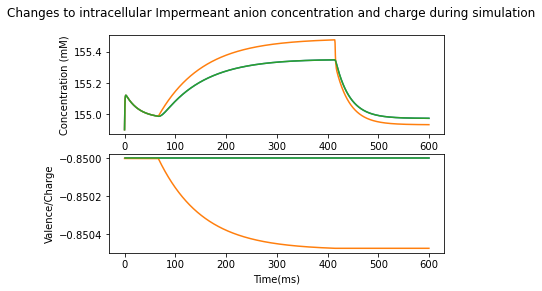

In [13]:
##################################################################
# WIDGET INITIALIZATION:

lbl_xchange = widgets.Label(value='Assess the changes to the concentration and charge of impermeant anions during the simulation')
btn_xchange = widgets.Button(description='Plot impermeant changes', button_style='info')

output_xchange = widgets.Output()

display(lbl_xchange,btn_xchange,output_xchange)


##################################################################
# IMPLEMENTATION:

          



def plot_xchange_graph():
    
    fig_xchange,(ax_conc,ax_charge) = mplt.subplots(2,1)
    fig_xchange.suptitle('Changes to intracellular Impermeant anion concentration and charge during simulation')
    ax_conc.set_ylabel("Concentration (mM)")
    ax_charge.set_ylabel("Valence/Charge")
    ax_charge.set_xlabel("Time(ms)")
    
  

    for i in range(len(sim.comp_arr)):
        y_arr = [master_arr[i][j][7]*1e3 for j in range(len(sim.interval_arr))]
        ax_conc.plot(t_arr,y_arr, label = sim.comp_arr[i].name)
        y_arr = [master_arr[i][j][8] for j in range(len(sim.interval_arr))]
        ax_charge.plot(t_arr,y_arr, label = sim.comp_arr[i].name)
    
    
def btn_xchange_clicked(b):
    output_xchange.clear_output()
    with output_xchange:
        plot_xchange_graph()
    

btn_xchange.on_click(btn_xchange_clicked)

#l = len(comp_arr[1].z_arr)


#print(comp_arr[1].z_diff)

#for j in range (1000):
    #print(comp_arr[0].z_arr[round(l/1000*j)])

#print(comp_arr[2].z_arr)

#print(xflux_rate)
#print(comp_arr[0].flux_rate)

### Ionic Heatmap

In [30]:
### HEATMAP OF ION CHANGES DURING SIMULATION:

########################
# Widget initialization

btn_heat = widgets.Button(description = 'Show Heat Map')
drp_ion = widgets.Dropdown(description = 'Ion:',options=['Na','K','Cl','X'])
sldr_heat = widgets.IntSlider(description= 'Bins', value= 20, min = 5, max= 100, step=2)
output_heat = widgets.Output()

###########################
# Plotting function on click

def btn_heat_clicked(b):

    y_arr = []
    x_arr = []
    data_arr = []
    bins = sldr_heat.value
    ion = drp_ion.value
    jump = int(1000/bins)
    
    y_arr = [sim.comp_arr[j].name for j in range(len(sim.comp_arr))]
    x2_arr = t_arr[0:1000:jump]
    x_arr = [round(x2_arr[j],2) for j in range(len(x_arr)) ]
    
    for i in range(len(sim.comp_arr)):
        
        temp_arr =[]
        if ion == 'Na':
            na_arr = [master_arr[i][k][4]*1e3 for k in range(len(sim.interval_arr))]       
            temp_arr = na_arr[0:1000:jump]
            
            
        elif ion == 'K':
            k_arr = [master_arr[i][k][5]*1e3 for k in range(len(sim.interval_arr))]
            temp_arr = k_arr[0:1000:jump]
       
        elif ion == 'Cl':
            cl_arr = [master_arr[i][k][5]*1e3 for k in range(len(sim.interval_arr))]
            temp_arr = cl_arr[0:1000:jump]
        
        elif ion == 'X':
            x_arr = [master_arr[i][k][5]*1e3 for k in range(len(sim.interval_arr))]
            temp_arr = x_arr[0:1000:jump]
        
        data_arr.append(temp_arr)
                   
    
    
    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    
    
    
    with output_heat:
        output_heat.clear_output()
        mplt.figure()
        plt_heat = sns.heatmap(data_arr,cmap="BuPu", linewidth=0.5, xticklabels=x_arr, yticklabels=y_arr, cbar_kws={'label': 'Concentration (mM)'})
        mplt.xlabel("Simulation time (s)")
        mplt.ylabel("Compartment")
        mplt.show()
        
    
    #display(output_heat)
    
    
##################################

btn_heat.on_click(btn_heat_clicked)


display(drp_ion, sldr_heat,btn_heat,output_heat)

Dropdown(description='Ion:', options=('Na', 'K', 'Cl', 'X'), value='Na')

IntSlider(value=20, description='Bins', min=5, step=2)

Button(description='Show Heat Map', style=ButtonStyle())

Output()

### View ion fluxes through respective membrane channels

In [19]:
#############################################################################################################
# Widget interface

output_channels = widgets.Output()
lbl_channels = widgets.Label(value='Plot the concentrations of ions flowing through each channel')
drp_comp_channels = widgets.Dropdown()
drp_ion_channels = widgets.Dropdown()
btn_channels = widgets.Button(button_style='info', description = 'Plot')
options_drp_comp_channels =[]
options_drp_ion_channels = ['Na','K','Cl']

for i in range(len(sim.comp_arr)):
    options_drp_comp_channels.append(sim.comp_arr[i].name)

drp_comp_channels.options = options_drp_comp_channels
drp_ion_channels.options = options_drp_ion_channels
############################################################################################################    

    
def btn_channels_clicked(b):
    
    output_channels.clear_output()
    for c in range(len(sim.comp_arr)):
        if drp_comp_channels.value == sim.comp_arr[c].name:
            plot_channel_graph(c)
    
    
    
    
    
def plot_channel_graph(comp_num):
    
            
    x_sc = bqp.LinearScale()
    y_sc = bqp.LinearScale()
    col_sc = bqp.ColorScale(scheme="RdYlGn")  
    ax_x = bqp.Axis(scale = x_sc, label="Time(s)", min= t_arr[0], max=t_arr[-1])
    ax_y = bqp.Axis(scale = y_sc, label='Concentration (mM)', orientation='vertical', side='left')
        
    m_arr = [] #array for all the various marks
    y_arr = []
    
    if drp_ion_channels.value == 'Na':
        
        y_arr = master_arr[comp_num][0:-1:100]*1000
        
        m_arr.append(bqp.Lines(x= t_arr[0:-1:100],y= ,colors = ['#247BA0'], 
                       display_legend=True,labels= ['Leak'], scales = {'x': x_sc, "y": y_sc}))
        
        m_arr.append(bqp.Lines(x= t_arr[0:-1:100],y= master_arr[comp_num].d_na_atpase_arr[0:-1:100]*1000,colors = ['#70C1B3'], 
                       display_legend=True,labels= ['ATPase'], scales = {'x': x_sc, "y": y_sc}))
    
    
    elif drp_ion_channels.value == 'K':
        
        
        m_arr.append(bqp.Lines(x= t_arr[0:-1:100],y= comp_arr[comp_num].d_k_leak_arr[0:-1:100],colors = ['#247BA0'], 
                       display_legend=True,labels= ['Leak'], scales = {'x': x_sc, "y": y_sc}))
        
        m_arr.append(bqp.Lines(x= t_arr[0:-1:100],y= comp_arr[comp_num].d_k_atpase_arr[0:-1:100],colors = ['#70C1B3'], 
                       display_legend=True,labels= ['ATPase'], scales = {'x': x_sc, "y": y_sc}))
        
        m_arr.append(bqp.Lines(x= t_arr[0:-1:100],y= comp_arr[comp_num].d_k_kcc2_arr[0:-1:100],colors = ['#B2DBBF'], 
                       display_legend=True,labels= ['KCC2'], scales = {'x': x_sc, "y": y_sc}))
                   
    
    elif drp_ion_channels.value == "Cl":
    
        m_arr.append(bqp.Lines(x= t_arr[0:-1:100],y= comp_arr[comp_num].d_cl_leak_arr[0:-1:100],colors = ['#247BA0'], 
                       display_legend=True,labels= ['Leak'], scales = {'x': x_sc, "y": y_sc}))
        
        m_arr.append(bqp.Lines(x= t_arr[0:-1:100],y= comp_arr[comp_num].d_cl_kcc2_arr[0:-1:100],colors = ['#B2DBBF'], 
                       display_legend=True,labels= ['KCC2'], scales = {'x': x_sc, "y": y_sc}))
                   
         
                          
                
                       
                
    f_channels = bqp.Figure(title = 'Channel fluxes', marks=m_arr, axes=[ax_x, ax_y],legend_location='top-right',scales={'x': x_sc, 'color': col_sc, 'y': y_sc})
    
    f_channels.layout.height = '600px'
    f_channels.layout.width = '800px'
    output_channels.clear_output()
    with output_channels:    
        display(f_channels)
       
        
        

#############################################################################################################




display(lbl_channels, drp_comp_channels,drp_ion_channels, btn_channels, output_channels )
btn_channels.on_click(btn_channels_clicked)


SyntaxError: invalid syntax (<ipython-input-19-c52bd38e359f>, line 47)

### Compartment equilibria


In [14]:
#############################################################################################################
# Widget interface
output_equilib = widgets.Output()
output_equilib.layout = Layout(border='solid')
output_equilib_save = widgets.Output(Layout=Layout(border='solid'))
output_legend = widgets.Output()
btn_equilib = widgets.Button(description ="View Equilibrium dynamic",button_style='info')
btn_equilib_save = widgets.Button(description = "Save Graph as png",button_style='info')

drp_equilib = widgets.Dropdown(description ="Compartment")
options_arr = []


for i in range(len(sim.comp_arr)):
    options_arr.append(sim.comp_arr[i].name) 
    
drp_equilib.options = options_arr


display(drp_equilib, btn_equilib, output_equilib, output_equilib_save)

#############################################################################################################
# Creating Equilibria figures



def btn_equilib_clicked(b):
    
    #### Instantiating figure
    
    
    with output_equilib_save:
        display(btn_equilib_save)
    
    
    
    #ISOLATING SPECIFIC COMPARTMENT
    temp_name = drp_equilib.value 
    temp_num = 0 
    
    for i in range(len(sim.comp_arr)):
        if sim.comp_arr[i].name == temp_name:
            temp_num = i
            
    shapes_arr =[]
    
    with output_equilib:
        
        output_equilib.clear_output()
        
        f1 = mplt.figure(figsize=(25,10))
        ax = mplt.gca()
        
        ######### Main compartment:
        
        mainx = 32 #starting x-coordinate for main rectangle if not the last compartment
        mainy = 4  #starting y-coordinate for main rectangle
        main_rect = mpatches.Rectangle([mainx,mainy],20,16, fc='#c4c4ff',ec='red')
        main_atpase = mpatches.Ellipse([mainx+3,mainy+16],width=2, height=4,fc = '#964b00')
        main_kcc2 = mpatches.Ellipse([mainx+8,mainy+16],width=4, height=2,fc = '#8f4f66')
        shapes_arr.append(main_rect)
        shapes_arr.append(main_atpase)
        shapes_arr.append(main_kcc2)
        
        m_net_in = 0
        m_net_out = 0

        ######## Main ATPASE:
        
        m_na_atpase = master_arr[temp_num][-1][11]*1e10
        if m_na_atpase >0: #Sodium coming into the compartment
            m_na_atpase_arrow = mpatches.FancyArrow(mainx+3, mainy+16,0,-2,width=0.2,ec='#e7298a',fc='#e7298a',ls='--')
            ax.text(mainx+2.5,mainy+12.5, str(round(m_na_atpase,1)), fontsize=11)
            m_net_in += m_na_atpase
        else:
            m_na_atpase_arrow = mpatches.FancyArrow(mainx+3, mainy+16,0,+2,width=0.2,ec='#e7298a',fc='#e7298a',ls='--')
            ax.text(mainx+2.5,mainy+19, str(round(m_na_atpase,1)*-1), fontsize=11)
            m_net_out += -1*m_na_atpase
        shapes_arr.append(m_na_atpase_arrow)
        
        m_k_atpase = master_arr[temp_num][-1][14]*1e10
        if m_k_atpase >0: #POtassium coming into the compartment
            m_k_atpase_arrow = mpatches.FancyArrow(mainx+3, mainy+16,0,-2,width=0.2, ec='#7570b3',fc='#7570b3',ls='--')
            ax.text(mainx+2.5,mainy+12.5, str(round(m_k_atpase,1)), fontsize=11)
            m_net_in += m_k_atpase
        else:
            m_k_atpase_arrow = mpatches.FancyArrow(mainx+3, mainy+16,0,+2,width=0.2, ec='#7570b3',fc='#7570b3',ls='--')
            ax.text(mainx+2.5,mainy+19, str(round(m_k_atpase,1)*-1), fontsize=11)
            m_net_out += -1*m_k_atpase
        shapes_arr.append(m_k_atpase_arrow)
        
        ######## Main KCC2:
        
        m_k_kcc2 = master_arr[temp_num][-1][15]*1e10
        if m_k_kcc2 >0: #Potassium entering via KCC2
            m_k_kcc2_arrow = mpatches.FancyArrow(mainx+7, mainy+16,0,-2,width=0.2,ec='#7570b3',fc='#7570b3',ls='--')
            ax.text(mainx+6.5,mainy+12.5, str(round(m_k_kcc2,1)), fontsize=11)
            m_net_in += m_k_kcc2
        else:
            m_k_kcc2_arrow = mpatches.FancyArrow(mainx+7, mainy+16,0,+2,width=0.2,ec='#7570b3',fc='#7570b3',ls='--')
            ax.text(mainx+6.5,mainy+19, str(round(m_k_kcc2,1)*-1), fontsize=11)
            m_net_out += -1*m_k_kcc2
        shapes_arr.append(m_k_kcc2_arrow)
        
        m_cl_kcc2 = master_arr[temp_num][-1][18]*1e10
        if m_cl_kcc2 >0: #cl coming into the compartment
            m_cl_kcc2_arrow = mpatches.FancyArrow(mainx+9, mainy+16,0,-2,width=0.2, ec='#1b9e77',fc='#1b9e77',ls='--')
            ax.text(mainx+8.5,mainy+12.5, str(round(m_cl_kcc2,1)), fontsize=11)
            m_net_in -= m_cl_kcc2
        else:
            m_cl_kcc2_arrow = mpatches.FancyArrow(mainx+9, mainy+16,0,+2,width=0.2, ec='#1b9e77',fc='#1b9e77',ls='--')
            ax.text(mainx+8.5,mainy+19, str(round(m_cl_kcc2,1)*-1), fontsize=11)
            m_net_out += m_cl_kcc2
        shapes_arr.append(m_cl_kcc2_arrow)
        
            
        ########## Main Na Leak:
        
        m_na_leak = mpatches.Rectangle([mainx+12, mainy+15.5], 2,1,fc='#000000')
        shapes_arr.append(m_na_leak)
        
        m_d_na = master_arr[temp_num][-1][10]*1e10
        if m_d_na >0: #sodium coming into the compartment
            m_na_arrow = mpatches.FancyArrow(mainx+13, mainy+16, 0, -2, width=0.2,ec='#e7298a',fc='#e7298a')
            ax.text(mainx+12.5,mainy+12,str(round(m_d_na,1)), fontsize=11)
            m_net_in += m_d_na #adding sodium coming in
        else:
            m_na_arrow = mpatches.FancyArrow(mainx+13, mainy+16, 0, +2, width=0.2,ec='#e7298a',fc='#e7298a')
            ax.text(mainx+12.5,mainy+19,str(round(m_d_na,1)), fontsize=11)
            m_net_out += -1*m_d_na
        shapes_arr.append(m_na_arrow)

        ########## Main K Leak:
        
        m_k_leak = mpatches.Rectangle([mainx+15, mainy+15.5], 2,1,fc='#000000')
        shapes_arr.append(m_k_leak)
        
        m_d_k = master_arr[temp_num][-1][13]*1e10
        if m_d_k >0: #potassium coming into the compartment
            m_k_arrow = mpatches.FancyArrow(mainx+16, mainy+16, 0, -2, width=0.2,ec='#7570b3',fc='#7570b3')
            ax.text(mainx+15.5,mainy+12,str(round(m_d_k,1)), fontsize=11)
            m_net_in += m_d_k
        else:
            m_k_arrow = mpatches.FancyArrow(mainx+16, mainy+16, 0, +2, width=0.2,ec='#7570b3',fc='#7570b3')
            ax.text(mainx+15.5,mainy+19,str(round(m_d_k,1)), fontsize=11)
            m_net_out += -1*m_d_k
        shapes_arr.append(m_k_arrow)

        ########## Main Cl Leak:
        
        m_cl_leak = mpatches.Rectangle([mainx+18, mainy+15.5], 2,1,fc='#000000')
        shapes_arr.append(m_cl_leak)
        
        m_d_cl = master_arr[temp_num][-1][17]*1e10
        if m_d_cl >0: #chloride coming into selected (main) compartment
            m_cl_arrow = mpatches.FancyArrow(mainx+19, mainy+16, 0, -2, width=0.2,ec='#1b9e77',fc='#1b9e77')
            ax.text(mainx+18,mainy+12,str(round(m_d_cl,1)), fontsize=11)
            m_net_in -= m_d_cl #minus chloride coming in
        else:
            m_cl_arrow = mpatches.FancyArrow(mainx+19, mainy+16, 0, +2, width=0.2,ec='#1b9e77',fc='#1b9e77')
            ax.text(mainx+18,mainy+19,str(round(m_d_cl,1)), fontsize=11)
            m_net_out += m_d_cl
        shapes_arr.append(m_cl_arrow)




        ######## Right Compartment

        rightx = mainx+22
        righty = 4
        right_comp=False
        r_net_in =0
        r_net_out =0

        if temp_num+1 != len(comp_arr):   #if not the last componenent, make rectangle on right

            right_comp = True
            right_rect = mpatches.Rectangle([rightx,righty],20,16, fc='#ebebff')
            right_atpase = mpatches.Ellipse([rightx+3,righty+16],width=2, height=4,fc = '#964b00')
            right_kcc2 = mpatches.Ellipse([rightx+8,righty+16],width=4, height=2,fc = '#8f4f66')
            shapes_arr.append(right_rect)
            shapes_arr.append(right_atpase)
            shapes_arr.append(right_kcc2)
            
            
            #### Right ATPase
            r_na_atpase = master_arr[temp_num+1][-1][11]*1e10
            if r_na_atpase >0: #Sodium coming into the compartment
                r_na_atpase_arrow = mpatches.FancyArrow(rightx+3, righty+16,0,-2,width=0.2,ec='#e7298a',fc='#e7298a',ls='--')
                ax.text(rightx+2.5,righty+12.5, str(round(r_na_atpase,1)), fontsize=11)
                r_net_in += r_na_atpase
            else:
                r_na_atpase_arrow = mpatches.FancyArrow(rightx+3, righty+16,0,+2,width=0.2,ec='#e7298a',fc='#e7298a',ls='--')
                ax.text(rightx+2.5,righty+19, str(round(r_na_atpase,1)*-1), fontsize=11)
                r_net_out += -1*r_na_atpase
            shapes_arr.append(r_na_atpase_arrow)

            r_k_atpase = master_arr[temp_num+1][-1][14]*1e10
            if r_k_atpase >0: #Sodium coming into the compartment
                r_k_atpase_arrow = mpatches.FancyArrow(rightx+3, righty+16,0,-2,width=0.2, ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(rightx+2.5,righty+12.5, str(round(r_k_atpase,1)), fontsize=11)
                r_net_in += r_k_atpase
            else:
                r_k_atpase_arrow = mpatches.FancyArrow(rightx+3, righty+16,0,+2,width=0.2, ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(rightx+2.5,righty+19, str(round(r_k_atpase,1)*-1), fontsize=11)
                r_net_out += -1*r_k_atpase
            shapes_arr.append(r_k_atpase_arrow)
            
            ######## Right KCC2:
        
            r_k_kcc2 = master_arr[temp_num+1][-1][15]*1e10
            if r_k_kcc2 >0: #Potassium entering via KCC2
                r_k_kcc2_arrow = mpatches.FancyArrow(rightx+7, righty+16,0,-2,width=0.2,ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(rightx+6.5,righty+12.5, str(round(r_k_kcc2,1)), fontsize=11)
                r_net_in += r_k_kcc2
            else:
                r_k_kcc2_arrow = mpatches.FancyArrow(rightx+7, righty+16,0,+2,width=0.2,ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(rightx+6.5,righty+19, str(round(r_k_kcc2,1)*-1), fontsize=11)
                r_net_out += -1*r_k_kcc2
            shapes_arr.append(r_k_kcc2_arrow)

            r_cl_kcc2 =  master_arr[temp_num+1][-1][18]*1e10
            if r_cl_kcc2 >0: #Cl coming into the compartment via KCC2
                r_cl_kcc2_arrow = mpatches.FancyArrow(rightx+9, righty+16,0,-2,width=0.2, ec='#1b9e77',fc='#1b9e77',ls='--')
                ax.text(rightx+8.5,righty+12.5, str(round(r_cl_kcc2,1)), fontsize=11)
                r_net_in += -1*r_cl_kcc2
            else:
                r_cl_kcc2_arrow = mpatches.FancyArrow(rightx+9, righty+16,0,+2,width=0.2, ec='#1b9e77',fc='#1b9e77',ls='--')
                ax.text(rightx+8.5,righty+19, str(round(r_cl_kcc2,1)*-1), fontsize=11)
                r_net_out += r_cl_kcc2
            shapes_arr.append(r_cl_kcc2_arrow)
        
            
            #d_Na
            
            r_na_leak = mpatches.Rectangle([rightx+12, righty+15.5], 2,1,fc='#000000')
            shapes_arr.append(r_na_leak)
            
            r_d_na = master_arr[temp_num+1][-1][10]*1e10
            if r_d_na >0: #sodium coming into the compartment
                r_na_arrow = mpatches.FancyArrow(rightx+13, righty+16, 0, -2, width=0.2,ec='#e7298a',fc='#e7298a')
                ax.text(rightx+12.5,righty+12,str(round(r_d_na,1)), fontsize=11)
                r_net_in +=r_d_na
            else:
                r_na_arrow = mpatches.FancyArrow(rightx+13, righty+16, 0, +2, width=0.2,ec='#e7298a',fc='#e7298a')
                ax.text(rightx+12.5,righty+19,str(round(r_d_na,1)), fontsize=11)
                r_net_out += -1*r_d_na
            shapes_arr.append(r_na_arrow)

            #d_K
            
            r_k_leak = mpatches.Rectangle([rightx+15, righty+15.5], 2,1,fc='#000000')
            shapes_arr.append(r_k_leak)
            
            r_d_k = master_arr[temp_num+1][-1][13]*1e10
            if r_d_k >0: #potassium coming into the compartment
                r_k_arrow = mpatches.FancyArrow(rightx+16, righty+16, 0, -2, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx+15.5,righty+12,str(round(r_d_k,1)), fontsize=11)
                r_net_in += r_d_k
            else:
                r_k_arrow = mpatches.FancyArrow(rightx+16, righty+16, 0, +2, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx+15.5,righty+19,str(round(r_d_k,1)), fontsize=11)
                r_net_out += -1*r_d_k
            shapes_arr.append(r_k_arrow)


            #d_Cl
            
            r_cl_leak = mpatches.Rectangle([rightx+18, righty+15.5], 2,1,fc='#000000')
            shapes_arr.append(r_cl_leak)
            
            r_d_cl = master_arr[temp_num+1][-1][17]*1e10
            if r_d_cl >0: #chloride coming into the compartment
                r_cl_arrow = mpatches.FancyArrow(rightx+19, righty+16, 0, -2, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx+18,righty+12,str(round(r_d_cl,1)), fontsize=11)
                r_net_in -= r_d_cl
            else:
                r_cl_arrow = mpatches.FancyArrow(rightx+19, righty+16, 0, +2, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx+18,righty+19,str(round(r_d_cl,1)), fontsize=11)
                r_net_out += r_d_cl
            shapes_arr.append(r_cl_arrow)

            #Right Electrodiffusion
            r_ed_dict = sim.ed_conc_changes_arr[temp_num]
            
            r_ed_na = r_ed_dict["na"]*1e10
            if r_ed_na >0: 
                r_ed_na_arrow = mpatches.FancyArrow(rightx+2, righty+8, -5, 0, width=0.2,ec='#e7298a',fc='#e7298a',ls='dotted')
                ax.text(rightx+2,righty+7.75,str(round(r_ed_na,1)), fontsize=11)
                shapes_arr.append(r_ed_na_arrow)
                r_net_out += r_ed_na
                m_net_in += r_ed_na

            else: #Sodium moving out of cell
                r_ed_na_arrow = mpatches.FancyArrow(rightx-4, righty+8, +5, 0, width=0.2,ec='#e7298a',fc='#e7298a',ls ='dotted')
                ax.text(rightx+2,righty+7.75,str(round(r_ed_na,1)), fontsize=11)
                shapes_arr.append(r_ed_na_arrow)
                r_net_in += -1*r_ed_na
                m_net_out += -1*r_ed_na

            r_ed_k = r_ed_dict["k"]*1e10
            if r_ed_k >0: 
                r_ed_k_arrow = mpatches.FancyArrow(rightx+2, righty+6, -5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx-7,righty+5.75,str(round(r_ed_k,1)), fontsize=11)
                shapes_arr.append(r_ed_k_arrow)
                r_net_out += r_ed_k
                m_net_in += r_ed_k
            else:
                r_ed_k_arrow = mpatches.FancyArrow(rightx-4, righty+6, +5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(rightx+2,righty+5.75,str(round(r_ed_k,1)), fontsize=11)
                shapes_arr.append(r_ed_k_arrow)
                r_net_in -= r_ed_k
                m_net_out -= r_ed_k

            r_ed_cl = r_ed_dict["cl"]*1e10
            if r_ed_cl >0: 
                r_ed_cl_arrow = mpatches.FancyArrow(rightx+2, righty+4, -5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx-7,righty+3.75,str(round(r_ed_cl,1)),fontsize=11)
                shapes_arr.append(r_ed_cl_arrow)
                r_net_out -= r_ed_cl
                m_net_in -= r_ed_cl
            else:
                r_ed_cl_arrow = mpatches.FancyArrow(rightx-4, righty+4, +5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(rightx+2,righty+3.75,str(round(r_ed_cl,1)),fontsize=11)
                shapes_arr.append(r_ed_cl_arrow)
                r_net_in += r_ed_cl
                m_net_out += r_ed_cl

            #Right Ion square:
            #r_net_rect = mpatches.Rectangle([rightx+8,righty+7],5,2.5, fc='#ebebff')
            #shapes_arr.append(r_net_rect)
            ax.text(rightx+7.5, righty+8.5,"Net in: " + str(round(r_net_in,2)),fontsize=11)
            ax.text(rightx+7.5, righty+7.5,"Net out: " + str(round(r_net_out,2)),fontsize=11) 


        ######## Left Compartment

        leftx = mainx-22
        lefty=4
        left_comp=False
        l_net_in =0
        l_net_out =0

        if temp_num+1 != 1:   #if not the first componenent, make rectangle on left

            left_comp = True
            left_rect = mpatches.Rectangle([leftx,lefty],20,16, fc='#ebebff')
            shapes_arr.append(left_rect)
            left_atpase = mpatches.Ellipse([leftx+3,lefty+16],width=2, height=4,fc = '#964b00')
            left_kcc2 = mpatches.Ellipse([leftx+8,lefty+16],width=4, height=2,fc = '#8f4f66')
            shapes_arr.append(left_atpase)
            shapes_arr.append(left_kcc2)
            
            #### Left ATPase
            l_na_atpase = master_arr[temp_num-1][-1][11]*1e10
            if l_na_atpase >0: #Sodium coming into the compartment
                l_na_atpase_arrow = mpatches.FancyArrow(leftx+3, lefty+16,0,-2,width=0.2,ec='#e7298a',fc='#e7298a',ls='--')
                ax.text(leftx+2.5,lefty+12.5, str(round(l_na_atpase,1)), fontsize=11)
                l_net_in += l_na_atpase
            else:
                l_na_atpase_arrow = mpatches.FancyArrow(leftx+3, lefty+16,0,+2,width=0.2,ec='#e7298a',fc='#e7298a',ls='--')
                ax.text(leftx+2.5,lefty+19, str(round(l_na_atpase,1)*-1), fontsize=11)
                l_net_out -= l_na_atpase
            shapes_arr.append(l_na_atpase_arrow)

            l_k_atpase = master_arr[temp_num-1][-1][14]*1e10
            if l_k_atpase >0: #Sodium coming into the compartment
                l_k_atpase_arrow = mpatches.FancyArrow(leftx+3, lefty+16,0,-2,width=0.2, ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(leftx+2.5,lefty+12.5, str(round(l_k_atpase,1)),fontsize=11)
                l_net_in += l_k_atpase
            else:
                l_k_atpase_arrow = mpatches.FancyArrow(leftx+3, lefty+16,0,+2,width=0.2, ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(leftx+2.5,lefty+19, str(round(l_k_atpase,1)*-1), fontsize=11)
                l_net_out -= l_k_atpase
            shapes_arr.append(l_k_atpase_arrow)
            
            ######## Left KCC2:
        
            l_k_kcc2 = master_arr[temp_num-1][-1][15]*1e10
            if l_k_kcc2 >0: #Potassium entering via KCC2
                l_k_kcc2_arrow = mpatches.FancyArrow(leftx+7, lefty+16,0,-2,width=0.2,ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(leftx+6.5,lefty+12.5, str(round(l_k_kcc2,1)),fontsize=11)
                l_net_in += l_k_kcc2
            else:
                l_k_kcc2_arrow = mpatches.FancyArrow(leftx+7, lefty+16,0,+2,width=0.2,ec='#7570b3',fc='#7570b3',ls='--')
                ax.text(leftx+6.5,lefty+19, str(round(l_k_kcc2,1)*-1),fontsize=11)
                l_net_out -= l_k_kcc2
            shapes_arr.append(l_k_kcc2_arrow)

            l_cl_kcc2 = master_arr[temp_num-1][-1][18]*1e10
            if l_cl_kcc2 >0: #Sodium coming into the compartment
                l_cl_kcc2_arrow = mpatches.FancyArrow(leftx+9, lefty+16,0,-2,width=0.2, ec='#1b9e77',fc='#1b9e77',ls='--')
                ax.text(leftx+8.5,lefty+12.5, str(round(l_cl_kcc2,1)),fontsize=11)
                l_net_in -= l_cl_kcc2
            else:
                l_cl_kcc2_arrow = mpatches.FancyArrow(leftx+9, lefty+16,0,+2,width=0.2, ec='#1b9e77',fc='#1b9e77',ls='--')
                ax.text(leftx+8.5,lefty+19, str(round(l_cl_kcc2,1)*-1),fontsize=11)
                l_net_out += l_cl_kcc2
            shapes_arr.append(l_cl_kcc2_arrow)
            
            #d_Na
            
            l_na_leak = mpatches.Rectangle([leftx+12, lefty+15.5], 2,1,fc='#000000')
            shapes_arr.append(l_na_leak)
            
            l_d_na = master_arr[temp_num-1][-1][10]*1e10
            if l_d_na >0: #sodium coming into the left compartment
                l_na_arrow = mpatches.FancyArrow(leftx+13, lefty+16, 0, -2, width=0.2, ec='#e7298a',fc='#e7298a')
                ax.text(leftx+12.5,lefty+12,str(round(l_d_na,1)), fontsize=11)
                l_net_in += l_d_na
            else:
                l_na_arrow = mpatches.FancyArrow(leftx+13, lefty+16, 0, +2, width=0.2,ec='#e7298a',fc='#e7298a')
                ax.text(leftx+12.5,lefty+19,str(round(l_d_na,1)), fontsize=11)
                l_net_out += -1*l_d_na
            shapes_arr.append(l_na_arrow)

            #d_K
            
            l_k_leak = mpatches.Rectangle([leftx+15, lefty+15.5], 2,1,fc='#000000')
            shapes_arr.append(l_k_leak)
            
            l_d_k = master_arr[temp_num-1][-1][13]*1e10
            if l_d_k >0: #potassium coming into the compartment
                l_k_arrow = mpatches.FancyArrow(leftx+16, lefty+16, 0, -2, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(leftx+15.5,lefty+12,str(round(l_d_k,1)),fontsize=11)
                l_net_in += l_d_k
            else:
                l_k_arrow = mpatches.FancyArrow(leftx+16, lefty+16, 0, +2, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(leftx+15.5,lefty+19,str(round(l_d_k,1)), fontsize=11)
                l_net_out += -1*l_d_k
            shapes_arr.append(l_k_arrow)


            #d_Cl
            
            l_cl_leak = mpatches.Rectangle([leftx+18, lefty+15.5], 2,1,fc='#000000')
            shapes_arr.append(l_cl_leak)
            
            l_d_cl = master_arr[temp_num-1][-1][17]*1e10
            if l_d_cl >0: #chloride coming into the compartment
                l_cl_arrow = mpatches.FancyArrow(leftx+19, lefty+16, 0, -2, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(leftx+18,lefty+12,str(round(l_d_cl,1)), fontsize=11)
                l_net_in += -1*l_d_cl
            else:
                l_cl_arrow = mpatches.FancyArrow(leftx+19, lefty+16, 0, +2, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(leftx+18,lefty+19,str(round(l_d_cl,1)), fontsize=11)
                l_net_out += l_d_cl
            shapes_arr.append(l_cl_arrow)


            #Left compartment boundary (electrodiffusion):
            
            l_ed_dict = sim.ed_conc_changes_arr[temp_num-1]

            l_ed_na = l_ed_dict["na"]*1e10
            if l_ed_na >0: #sodium leaving the L compartment, entering main compartment via ED
                l_ed_na_arrow = mpatches.FancyArrow(mainx+2, mainy+8, -5, 0, width=0.2,ec='#e7298a',fc='#e7298a',hatch ='+')
                ax.text(mainx-7,mainy+7.75,str(round(l_ed_na,1)),fontsize=11)
                shapes_arr.append(l_ed_na_arrow)
                l_net_in += l_ed_na
                m_net_out += l_ed_na
            else: # sodium entering via ED
                l_ed_na_arrow = mpatches.FancyArrow(mainx-4, mainy+8, +5, 0, width=0.2,ec='#e7298a',fc='#e7298a',ls =':')
                ax.text(mainx+2,mainy+7.75,str(round(l_ed_na,1)), fontsize=11)
                shapes_arr.append(l_ed_na_arrow)
                l_net_out -= l_ed_na
                m_net_in -= l_ed_na

            l_ed_k = l_ed_dict["k"]*1e10
            if l_ed_k >0: #K leaving the compartment via ED
                l_ed_k_arrow = mpatches.FancyArrow(mainx+2, mainy+6, -5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(mainx-7,mainy+5.75,str(round(l_ed_k,1)), fontsize=11)
                shapes_arr.append(l_ed_k_arrow)
                l_net_in += l_ed_k
                m_net_out += l_ed_k
            else:
                l_ed_k_arrow = mpatches.FancyArrow(mainx-4, mainy+6, +5, 0, width=0.2,ec='#7570b3',fc='#7570b3')
                ax.text(mainx+2,mainy+5.75,str(round(l_ed_k,1)), fontsize=11)
                shapes_arr.append(l_ed_k_arrow)
                l_net_out -= l_ed_k
                m_net_in -= l_ed_k

            l_ed_cl = l_ed_dict["cl"]*1e10
            if l_ed_cl >0: #sodium coming into the compartment
                l_ed_cl_arrow = mpatches.FancyArrow(mainx+2, mainy+4, -5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(mainx-7,mainy+3.75,str(round(l_ed_cl,1)), fontsize=11)
                shapes_arr.append(l_ed_cl_arrow)
                l_net_in -= l_ed_cl
                m_net_out -= l_ed_cl
            else:
                l_ed_cl_arrow = mpatches.FancyArrow(mainx-4, mainy+4, +5, 0, width=0.2,ec='#1b9e77',fc='#1b9e77')
                ax.text(mainx+2,mainy+3.75,str(round(l_ed_cl,1)), fontsize=11)
                shapes_arr.append(l_ed_cl_arrow)
                l_net_out += l_ed_cl
                m_net_in += l_ed_cl



            #Left Ion square:
            #l_net_rect = mpatches.Rectangle([leftx+8,lefty+7],5,2.5, fc='#ebebff')
            #shapes_arr.append(l_net_rect)
            ax.text(leftx+7.5, lefty+8.5,"Net in: " + str(round(l_net_in,2)),fontsize=11)
            ax.text(leftx+7.5, lefty+7.5,"Net out: " + str(round(l_net_out,2)),fontsize=11)

        #Net Ion square:
        #m_net_rect = mpatches.Rectangle([mainx+8,mainy+7],5,2.5,fc='#ebebff')
        #shapes_arr.append(m_net_rect)
        ax.text(mainx+7.5, mainy+8.5,"Net in: " + str(round(m_net_in,2)),fontsize=11)
        ax.text(mainx+7.5, mainy+7.5,"Net out: " + str(round(m_net_out,2)),fontsize=11)



        ######### legend
        leg_rect = mpatches.Rectangle([65,32],8,12, fc='white', ec='black')
        shapes_arr.append(leg_rect)
        ax.text(65.5,44.2,"Legend", fontsize=13)
        
        leg_na_arrow = mpatches.FancyArrow(69, 42.5, 2, 0, width=0.1,ec='#e7298a',fc='#e7298a')
        shapes_arr.append(leg_na_arrow)
        ax.text(65.5,42.5,"Na+", fontsize=12)
        
        leg_k_arrow = mpatches.FancyArrow(69, 41, 2, 0, width=0.1,ec='#7570b3',fc='#7570b3')
        shapes_arr.append(leg_k_arrow)
        ax.text(65.5,41,"K+", fontsize=12)
        
        leg_cl_arrow = mpatches.FancyArrow(69, 39.5, 2, 0, width=0.1,ec='#1b9e77',fc='#1b9e77')
        shapes_arr.append(leg_cl_arrow)
        ax.text(65.5,39.5,"Cl-", fontsize=12)
        
        leg_atpase = mpatches.Ellipse([71,37],width=1, height=2,fc = '#964b00')
        shapes_arr.append(leg_atpase)
        ax.text(65.5,37,"ATPase", fontsize=12)
        
        leg_kcc2 = mpatches.Ellipse([71,35],width=2, height=1,fc = '#8f4f66')
        shapes_arr.append(leg_kcc2)
        ax.text(65.5,35,"KCC2", fontsize=12)
        
        leg_leak = mpatches.Rectangle([70, 33], 2,1,fc='#000000')
        shapes_arr.append(leg_leak)
        ax.text(65.5,33,"Leak", fontsize=12)




        for j in range(len(shapes_arr)):
            ax.add_patch(shapes_arr[j])

        

        ax.text(mainx+8.5,mainy+1,temp_name, fontsize=16)

        if left_comp == True: 
            ax.text(leftx+8.5,lefty+1,sim.comp_arr[temp_num-1].name, fontsize=16)

        if right_comp == True: 
            ax.text(rightx+8.5,righty+1,sim.comp_arr[temp_num+1].name, fontsize=16)

        mplt.axis("Scaled")
        #ax.text(mainx,30,"**All values are in 10^6 mM", fontsize=16)
        ax.axis("off")
        
        mplt.show()
        
        def btn_equilib_save_clicked(b):
    
            f1.savefig("BOUNDARY",format='png')
            print("Figure titled BOUNDARY saved in local directory")
                       
        btn_equilib_save.on_click(btn_equilib_save_clicked)


        
###########################################################################################################        
        

        
        

#############################################################################################################    
# Connecting button to backend

btn_equilib.on_click(btn_equilib_clicked)


Dropdown(description='Compartment', options=('Comp1', 'Comp2', 'Comp3'), value='Comp1')

Button(button_style='info', description='View Equilibrium dynamic', style=ButtonStyle())

Output(layout=Layout(border='solid'))

Output()

## D) Generate Simulation Report

In [ ]:
##################################
# WIDGET INITIALIZATION:
##################################

btn_report = widgets.Button(description = "Generate Report", button_style = 'info' )
output_report = widgets.Output()

display(btn_report, output_report)




df_start = pd.DataFrame()
#df_start.index = ['Radius', 'Length', 'Volume', 'Na_i', 'K_i', 'Cl_i', 'X_i', 'z_i', 'ATP pump rate', 'KCC2 pump rate',
 #               'Vm', 'Ek', 'ECl']


def btn_report_clicked(b):
    output_report.clear_output
    print(df_start)
    
btn_report.on_click(btn_report_clicked)